# SHapley Additive exPlanations

In [2]:
# import libraries
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

from utils import DataLoader

import matplotlib.pyplot as plt
import numpy as np

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
# setting up variables
SEED = 2021
STROKE_PATH = "data/stroke.csv"

## Load Dataset & Training Random Forest

In [4]:
data_loader = DataLoader(STROKE_PATH)
data_loader.preprocess_data()
X_train, X_test, y_train, y_test = data_loader.get_data_split()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4088, 21) (4088,)
(1022, 21) (1022,)


In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5054531918853526
Accuracy 0.949119373776908


## Explanation

In [6]:
explainer = shap.TreeExplainer(rf)
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [7]:
len(shap_values)

2

In [8]:
# shap values are a list of shape (num_classes, 1, num_features)
print(shap_values[0].shape)
shap_values

(1, 21)


[array([[-2.73363068e-04, -2.74036784e-04, -1.53525257e-07,
         -1.20659025e-03, -8.75842283e-05, -2.13973493e-04,
         -2.26839283e-05, -6.20515423e-04,  1.56230607e-03,
         -3.25790937e-04,  5.30707608e-04,  5.50446035e-04,
         -5.89571807e-04,  2.42837239e-03,  1.97261716e-03,
          4.75901684e-04,  2.47607948e-02,  2.01673059e-03,
          2.17871876e-03,  1.05166233e-02,  5.11419572e-03]]),
 array([[ 2.73363068e-04,  2.74036784e-04,  1.53525257e-07,
          1.20659025e-03,  8.75842283e-05,  2.13973493e-04,
          2.26839283e-05,  6.20515423e-04, -1.56230607e-03,
          3.25790937e-04, -5.30707608e-04, -5.50446035e-04,
          5.89571807e-04, -2.42837239e-03, -1.97261716e-03,
         -4.75901684e-04, -2.47607948e-02, -2.01673059e-03,
         -2.17871876e-03, -1.05166233e-02, -5.11419572e-03]])]

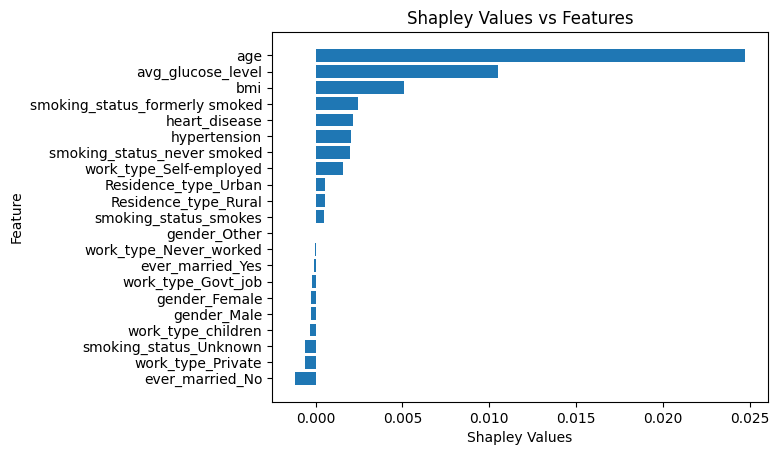

In [9]:
x = [X_test.columns[j] for j in np.argsort(shap_values[0])][0]
y = np.sort(shap_values[0].reshape(-1))
plt.barh(x, y)
 
plt.xlabel("Shapley Values")
plt.ylabel("Feature")

plt.title("Shapley Values vs Features")
plt.show()